In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Results from Embedding Tuning

In [2]:
embedding_performance = pd.DataFrame({
    "Metric": ["NDCG@3", "MRR@3", "MAP@3", "NDCG@3", "MRR@3", "MAP@3"],
    "Performance": [0.663874, 0.744084, 0.620971, 0.698001, 0.769290, 0.659422],
    "Model": ["Base", "Base", "Base", "Tuned", "Tuned", "Tuned"]
})

/home/sdai/PycharmProjects/FinBot/tuning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sdai/PycharmProjects/FinBot/tuning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sdai/PycharmProjects/FinBot/tuning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sdai/PycharmProjects/FinBot/tuning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

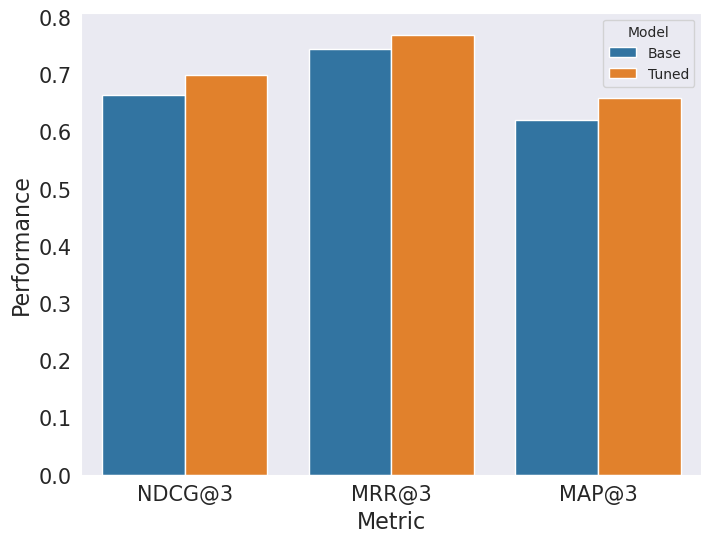

In [3]:
plt.figure(figsize=(8,6))
ax = sns.barplot(embedding_performance, x="Metric", y="Performance", hue="Model")
ax.grid(False)
ax.set_xlabel('Metric', fontsize=16)
ax.set_ylabel('Performance', fontsize=16)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig(fname="contrastive_perf.png", format="png")
plt.show()

## Abstractive Summarization

In [4]:
orca_rouge = pd.read_excel("gs://scraped-news-article-data-null/orca-mistral-rouge.xlsx")
llama_chat = pd.read_excel("gs://scraped-news-article-data-null/llama-chat-rouge.xlsx")
bison_rouge = pd.read_excel("gs://scraped-news-article-data-null/text-bison-rouge.xlsx")
tuned_rouge = pd.read_excel("gs://scraped-news-article-data-null/mistral-sum-rouge.xlsx")

In [5]:
orca_rouge["model"] = "Mistral-7B-Orca"
llama_chat["model"] = "Llama-Chat-7B"
bison_rouge["model"] = "Text-Bison"
tuned_rouge["model"] = "Tuned Mistral"

compiled_df = pd.concat([orca_rouge[["rouge2", "model"]], 
                         llama_chat[["rouge2", "model"]],
                         bison_rouge[["rouge2", "model"]],
                         tuned_rouge[["rouge2", "model"]]],
                        ignore_index=True)
compiled_df.head()

,rouge2,model
0,12.5000,Mistral-7B-Orca
1,16.2162,Mistral-7B-Orca
2,0.0000,Mistral-7B-Orca
3,21.6867,Mistral-7B-Orca
4,28.5714,Mistral-7B-Orca


/home/sdai/PycharmProjects/FinBot/tuning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sdai/PycharmProjects/FinBot/tuning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sdai/PycharmProjects/FinBot/tuning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


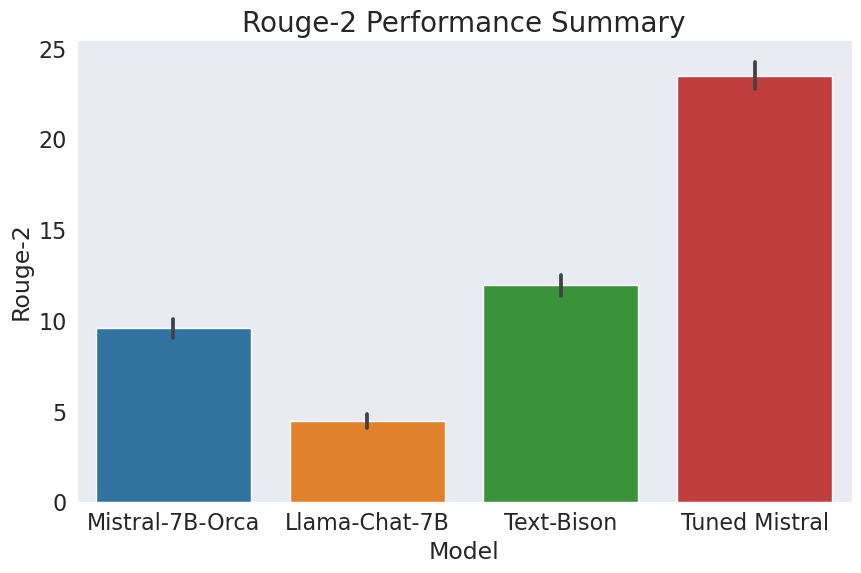

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(compiled_df, x="model", y="rouge2", errorbar="ci")
plt.title("Rouge-2 Performance Summary", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Model", fontsize=17)
plt.ylabel("Rouge-2", fontsize=17)
plt.grid(False)
plt.savefig(fname="rouge2.png", format="png")
plt.show()

/home/sdai/PycharmProjects/FinBot/tuning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sdai/PycharmProjects/FinBot/tuning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sdai/PycharmProjects/FinBot/tuning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


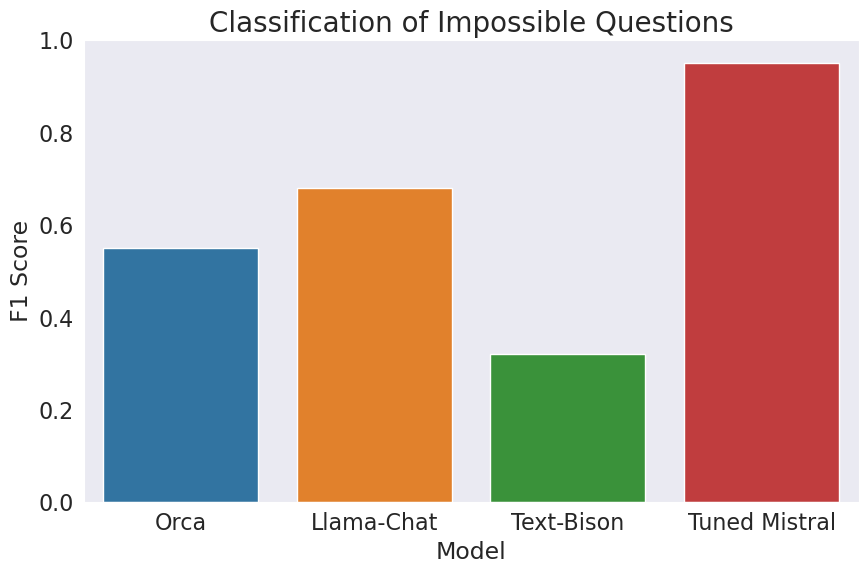

In [7]:
plt.figure(figsize=(10,6))
hallucination_df = pd.DataFrame({"F1": [0.55, 0.68, 0.32, 0.95], "Model": ["Orca", "Llama-Chat", "Text-Bison", "Tuned Mistral"]})
sns.barplot(hallucination_df, x="Model", y="F1")
plt.ylim((0, 1))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Model", fontsize=17)
plt.ylabel("F1 Score", fontsize=17)
plt.grid(False)
plt.title("Classification of Impossible Questions", fontsize=20)
plt.savefig(fname="tune_hal.png", format="png")
plt.show()

## QA

In [8]:
orca_rouge = pd.read_excel("gs://scraped-news-article-data-null/orca-mistral-qa-rouge.xlsx")
llama_chat = pd.read_excel("gs://scraped-news-article-data-null/llama-chat-qa-rouge.xlsx")
# bison_rouge = pd.read_excel("gs://scraped-news-article-data-null/text-bison-rouge.xlsx")
# tuned_rouge = pd.read_excel("gs://scraped-news-article-data-null/mistral-sum-rouge.xlsx")

In [9]:
orca_rouge["model"] = "Mistral-7B-Orca"
llama_chat["model"] = "Llama-Chat-7B"

compiled_df = pd.concat([orca_rouge[["rouge2", "model"]],
                         llama_chat[["rouge2", "model"]]],
                        ignore_index=True)
compiled_df.head()

,rouge2,model
0,83.3333,Mistral-7B-Orca
1,44.4444,Mistral-7B-Orca
2,30.4762,Mistral-7B-Orca
3,48.0769,Mistral-7B-Orca
4,40.0000,Mistral-7B-Orca


/home/sdai/PycharmProjects/FinBot/tuning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sdai/PycharmProjects/FinBot/tuning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sdai/PycharmProjects/FinBot/tuning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


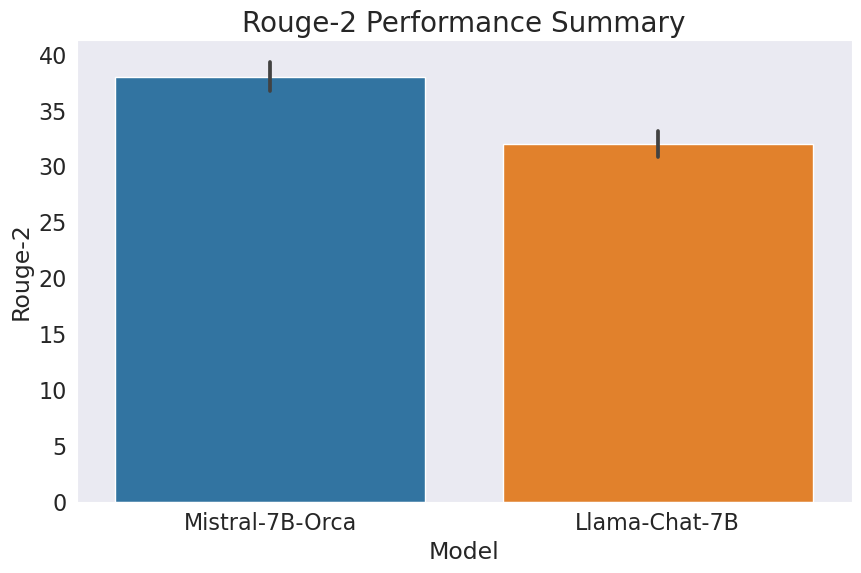

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(compiled_df, x="model", y="rouge2", errorbar="ci")
plt.title("Rouge-2 Performance Summary", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Model", fontsize=17)
plt.ylabel("Rouge-2", fontsize=17)
plt.grid(False)
plt.savefig(fname="rouge2.png", format="png")
plt.show()

/home/sdai/PycharmProjects/FinBot/tuning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sdai/PycharmProjects/FinBot/tuning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sdai/PycharmProjects/FinBot/tuning/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


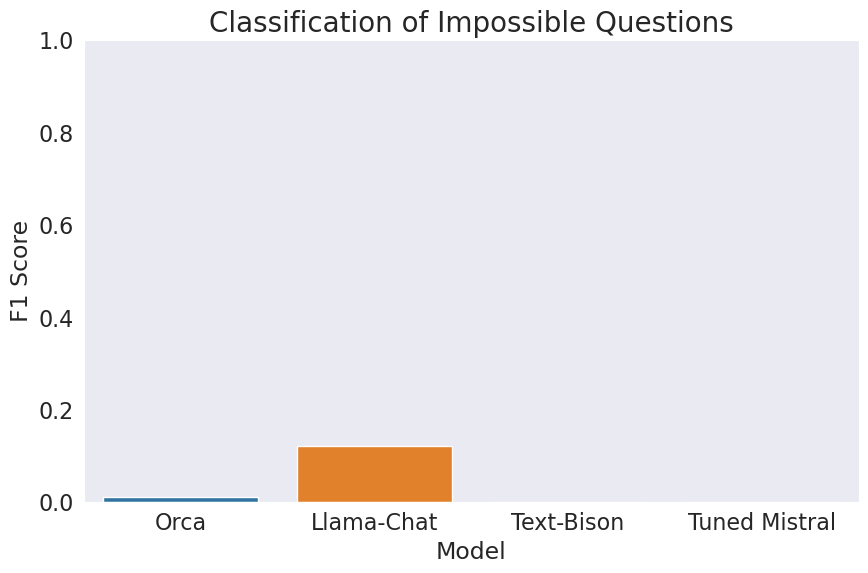

In [11]:
plt.figure(figsize=(10,6))
hallucination_df = pd.DataFrame({"F1": [0.01, 0.12, 0.0, 0.0], "Model": ["Orca", "Llama-Chat", "Text-Bison", "Tuned Mistral"]})
sns.barplot(hallucination_df, x="Model", y="F1")
plt.ylim((0, 1))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Model", fontsize=17)
plt.ylabel("F1 Score", fontsize=17)
plt.grid(False)
plt.title("Classification of Impossible Questions", fontsize=20)
plt.savefig(fname="tune_hal.png", format="png")
plt.show()